## **Classificação com redes neurais**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense,  BatchNormalization, Embedding, Concatenate, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.activations import relu, softmax
from keras.regularizers import l2
from keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import KFold

In [40]:
dataset = pd.read_csv('/kaggle/input/website-classification/website_classification.csv')
dataset.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [41]:
df = dataset[['website_url','cleaned_website_text','Category']].copy()
df.head()

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [42]:
pd.DataFrame(df.Category.unique()).values

array([['Travel'],
       ['Social Networking and Messaging'],
       ['News'],
       ['Streaming Services'],
       ['Sports'],
       ['Photography'],
       ['Law and Government'],
       ['Health and Fitness'],
       ['Games'],
       ['E-Commerce'],
       ['Forums'],
       ['Food'],
       ['Education'],
       ['Computers and Technology'],
       ['Business/Corporate'],
       ['Adult']], dtype=object)

##### representando cada categoria como um número, para que nosso modelo preditivo possa compreender melhor as diferentes categorias.

In [43]:
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates()

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

df.head()

,website_url,cleaned_website_text,Category,category_id
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,0
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,0
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,0
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel,0
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel,0


In [44]:
category_id_df

,Category,category_id
0,Travel,0
36,Social Networking and Messaging,1
43,News,2
107,Streaming Services,3
213,Sports,4
398,Photography,5
586,Law and Government,6
670,Health and Fitness,7
768,Games,8
810,E-Commerce,9


### **Aplicação do TF-IDF e Transformação dos dados**

In [103]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.cleaned_website_text).toarray()

# Codificando as categorias
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(df['Category'])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(features, dummy_y, test_size=0.20, random_state = 42)

#### Variaveis de configuração

In [104]:
layer1Neurons = 64
layer2Neurons = 32
outputLayerNeurons = 16
epochs = 300
batch_size = 32
optimizer="adam"
loss="categorical_crossentropy"
activation="relu"
activationOfOutput="softmax"

In [52]:
model = Sequential()
model.add(Dense(layer1Neurons, activation=activation, input_shape=(X_train.shape[1],)))
model.add(Dense(layer2Neurons, activation=activation))
model.add(Dense(outputLayerNeurons, activation=activationOfOutput))

In [53]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [54]:
historyBase = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/300
36/36 [==============================] - 1s 16ms/step - loss: 2.6643 - accuracy: 0.4147 - val_loss: 2.4700 - val_accuracy: 0.5106
Epoch 2/300
36/36 [==============================] - 1s 14ms/step - loss: 2.0229 - accuracy: 0.6972 - val_loss: 1.7952 - val_accuracy: 0.7660
Epoch 3/300
36/36 [==============================] - 0s 13ms/step - loss: 1.1348 - accuracy: 0.9254 - val_loss: 1.1841 - val_accuracy: 0.8511
Epoch 4/300
36/36 [==============================] - 0s 12ms/step - loss: 0.5385 - accuracy: 0.9707 - val_loss: 0.8609 - val_accuracy: 0.8830
Epoch 5/300
36/36 [==============================] - 0s 12ms/step - loss: 0.2715 - accuracy: 0.9805 - val_loss: 0.7082 - val_accuracy: 0.8901
Epoch 6/300
36/36 [==============================] - 0s 12ms/step - loss: 0.1571 - accuracy: 0.9920 - val_loss: 0.6313 - val_accuracy: 0.8936
Epoch 7/300
36/36 [==============================] - 0s 12ms/step - loss: 0.0987 - accuracy: 0.9982 - val_loss: 0.5839 - val_accuracy: 0.9043
Epoch 

In [55]:
def plot_learning_curves(history, history2, model_name1, model_name2):
    plt.figure(figsize=(16, 6))  # Aumentamos o tamanho para acomodar ambos os gráficos
    plt.subplot(1, 2, 1)  # Cria o primeiro subplot
    plt.plot(history.history['loss'], label='Training Loss')
    
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    
    plt.title(f'Curvas de Aprendizado - {model_name1}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)  # Cria o segundo subplot
    plt.plot(history2.history['loss'], label='Training Loss')
    
    if 'val_loss' in history2.history:
        plt.plot(history2.history['val_loss'], label='Validation Loss')
    
    plt.title(f'Curvas de Aprendizado - {model_name2}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()  # Garante que os subplots não se sobreponham
    plt.show()

Épocas: 300 épocas pode ser um bom ponto de partida, mas você deve monitorar a perda durante o treinamento. Se a perda parar de diminuir (ou começar a aumentar), pode ser um sinal de que o modelo está começando a sofrer de overfitting.

In [56]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

9/9 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.8865
Loss: 0.655440628528595
Accuracy: 0.8865247964859009


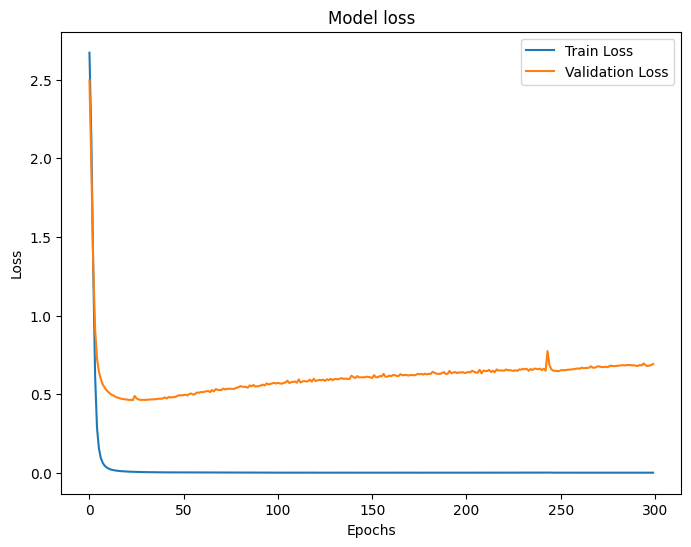

In [18]:
import matplotlib.pyplot as plt

# Plotando a curva de aprendizado
plt.figure(figsize=(8, 6))
plt.plot(historyBase.history['loss'], label='Train Loss')
plt.plot(historyBase.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

## **3-fold Cross Validation**

In [106]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.cleaned_website_text).toarray()

# Codificando as categorias
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(df['Category'])

dummy_y = np_utils.to_categorical(encoded_Y)

assert features.shape[0] == dummy_y.shape[0]

X_train, X_test, y_train, y_test = train_test_split(features, dummy_y, test_size=0.20, random_state = 42)

# Definindo a função para criar o modelo
def create_model():
    model = Sequential()
    model.add(Dense(layer1Neurons, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(layer2Neurons, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(outputLayerNeurons, activation=activationOfOutput))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# Criando o classificador Keras
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# Aplicando a validação cruzada de 3-fold
scores = cross_val_score(model, X_train, y_train, cv=3)

print(f'Scores da validação cruzada: {scores}')
print(f'Média dos scores: {scores.mean()}')

/tmp/ipykernel_32/3996196980.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)


Scores da validação cruzada: [0.88297874 0.88533336 0.89333332]
Média dos scores: 0.8872151374816895


In [29]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.cleaned_website_text).toarray()


encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(df['Category'])

dummy_y = np_utils.to_categorical(encoded_Y)

assert features.shape[0] == dummy_y.shape[0]

X_train, X_test, y_train, y_test = train_test_split(features, dummy_y, test_size=0.20, random_state = 42)

## **Regularização de L2**

In [47]:
model = Sequential()
model.add(Dense(layer1Neurons, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=l2(0.001)))
model.add(Dense(layer2Neurons, activation=activation, kernel_regularizer=l2(0.001)))
model.add(Dense(outputLayerNeurons, activation=activationOfOutput)) 

In [48]:
model.compile(optimizer=optimizer ,loss=loss)

In [49]:
historyWithL2 = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

In [50]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [51]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R² para treinamento: {r2_train}')
print(f'R² para teste: {r2_test}')

R² para treinamento: 0.9977461593730013
R² para teste: 0.7120507446040594


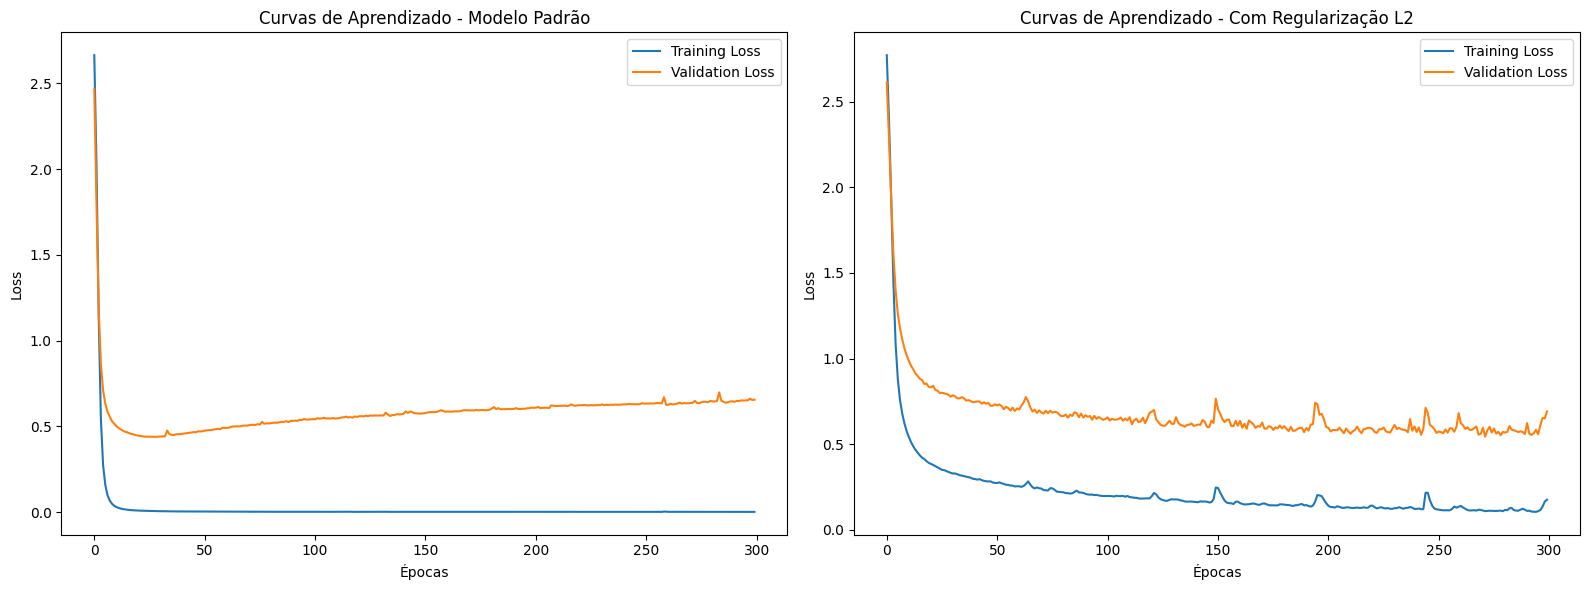

In [57]:
plot_learning_curves(historyBase, historyWithL2, 'Modelo Padrão', 'Com Regularização L2')

## **Dropout**

In [70]:
model = Sequential()
model.add(Dense(layer1Neurons, input_dim=X_train.shape[1], activation=activation))
model.add(Dropout(0.2)) 
model.add(Dense(layer2Neurons, activation=activation))
model.add(Dropout(0.2)) 
model.add(Dense(outputLayerNeurons, activation=activationOfOutput)) 

In [71]:
model.compile(optimizer=optimizer ,loss=loss)

In [72]:
historyDropout = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

In [73]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [74]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R² para treinamento: {r2_train}')
print(f'R² para teste: {r2_test}')

R² para treinamento: 0.9989294678823406
R² para teste: 0.7603444378359704


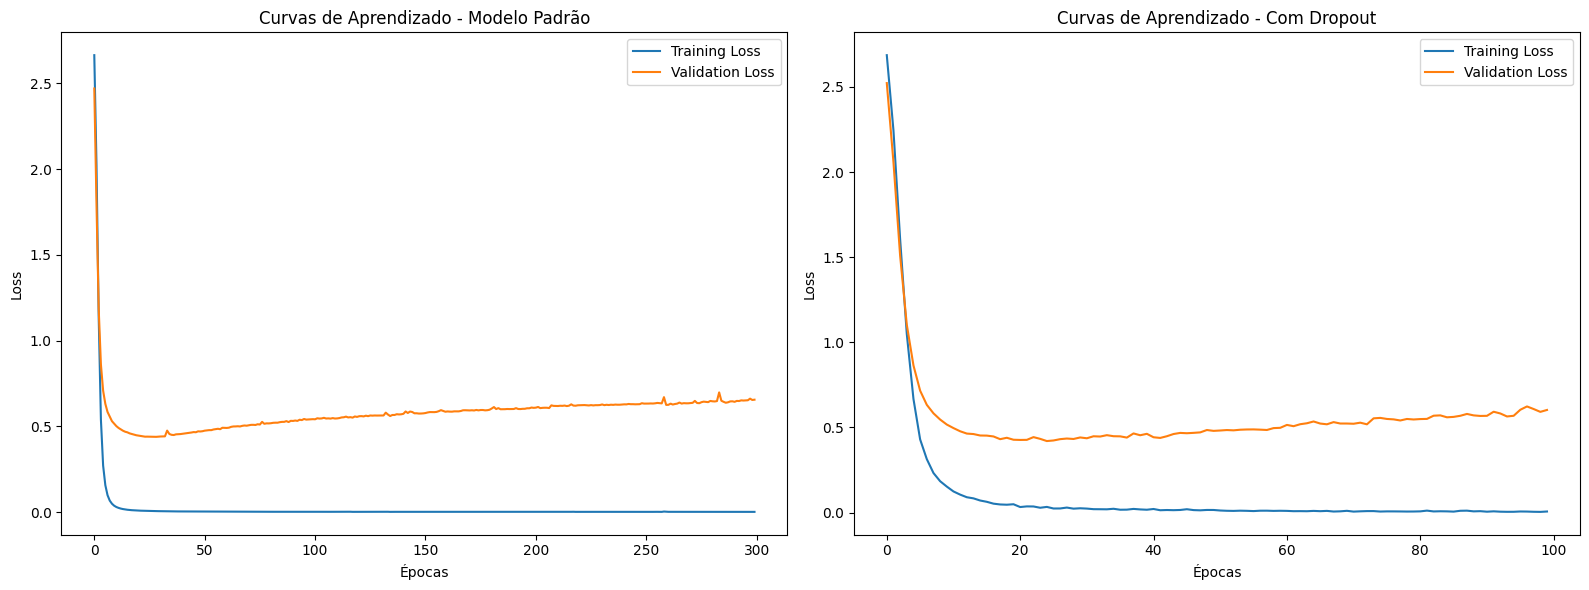

In [75]:
plot_learning_curves(historyBase, historyDropout, 'Modelo Padrão', 'Com Dropout')

## **Inicialização dos Pesos: Glorot**

In [76]:
model = Sequential()
model.add(Dense(layer1Neurons, input_dim=X_train.shape[1], activation=activation, kernel_initializer=glorot_uniform()))
model.add(Dense(layer2Neurons, activation=activation, kernel_initializer=glorot_uniform()))
model.add(Dense(outputLayerNeurons, activation=activationOfOutput)) 

In [77]:
model.compile(optimizer=optimizer ,loss=loss)

In [78]:
historyGlorot = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

In [79]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [80]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R² para treinamento: {r2_train}')
print(f'R² para teste: {r2_test}')

R² para treinamento: 0.9991379583495525
R² para teste: 0.7260475574344648


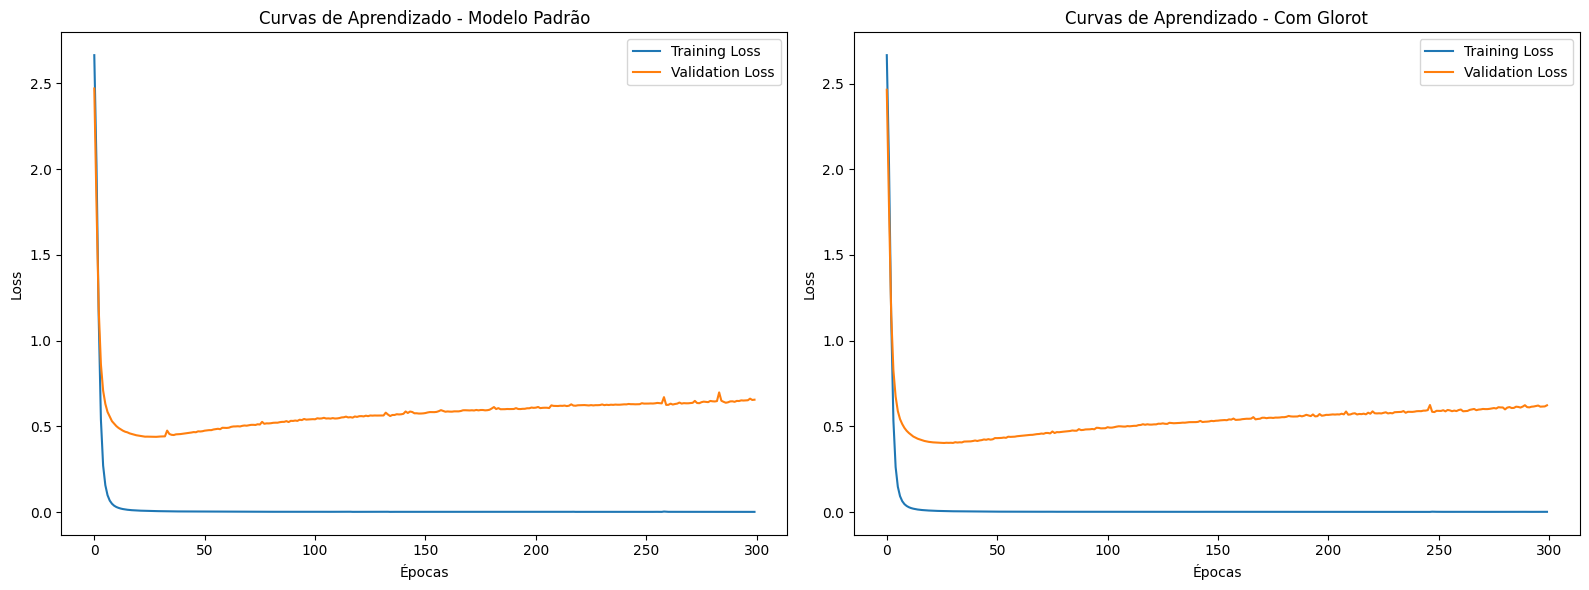

In [81]:
plot_learning_curves(historyBase, historyGlorot, 'Modelo Padrão', 'Com Glorot')

## **Normalização das Camadas: Batch Norm**

In [82]:
model = Sequential()
model.add(Dense(layer1Neurons, input_dim=X_train.shape[1], activation=activation))
model.add(BatchNormalization(epsilon=1e-5))
model.add(Dense(layer2Neurons, activation=activation))
model.add(BatchNormalization(epsilon=1e-5))
model.add(Dense(outputLayerNeurons, activation=activationOfOutput)) 

In [83]:
model.compile(optimizer=optimizer ,loss=loss)

In [84]:
historyBatchNorm = model.fit(X_train, y_train, epochs=epochs, batch_size=28, validation_data=(X_test, y_test), verbose=0)

In [85]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [86]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R² para treinamento: {r2_train}')
print(f'R² para teste: {r2_test}')

R² para treinamento: 0.9923601532266673
R² para teste: 0.6820161496944772


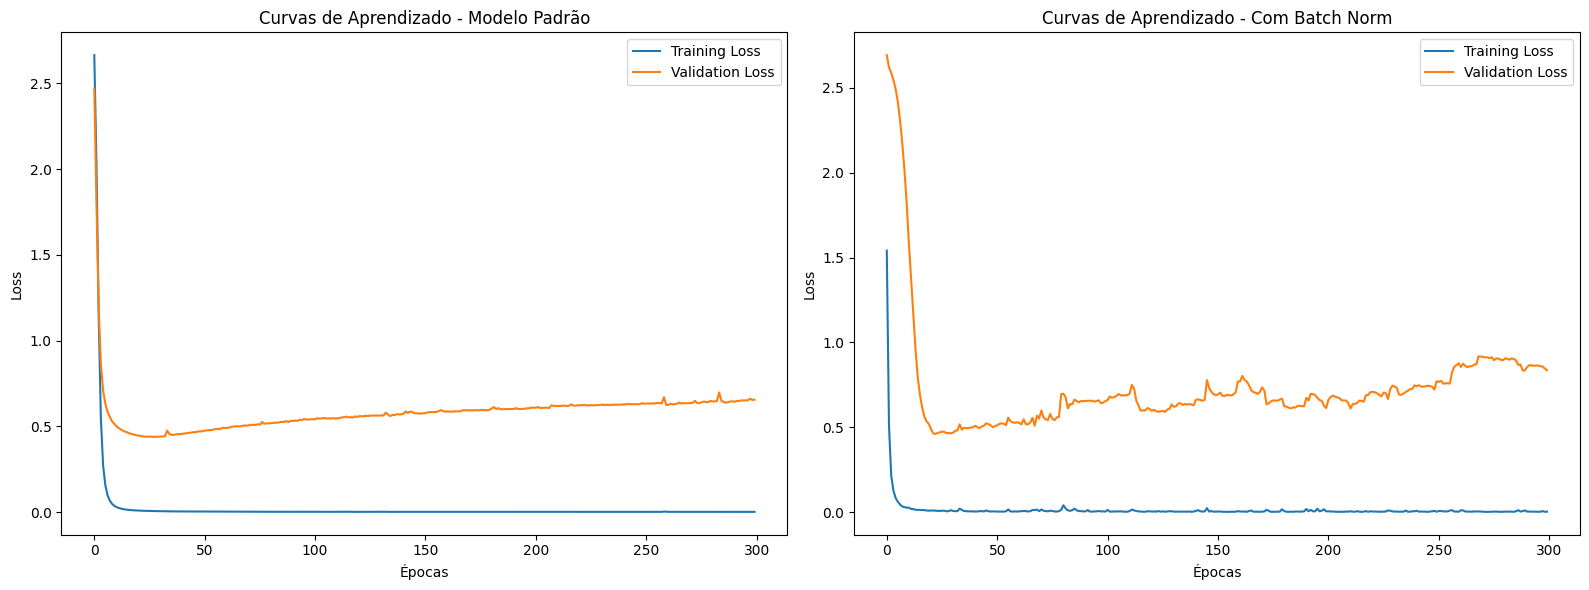

In [87]:
plot_learning_curves(historyBase, historyBatchNorm, 'Modelo Padrão', 'Com Batch Norm')

## **Exponencial Scheduling**

In [88]:
initial_learning_rate = 0.01 
decay_rate = 0.96  
decay_steps = 1

lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate
)

In [89]:
model = Sequential()
model.add(Dense(layer1Neurons, input_dim=X_train.shape[1], activation=activation))
model.add(Dense(layer2Neurons, activation=activation))
model.add(Dense(outputLayerNeurons, activation=activationOfOutput)) 

In [90]:
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss=loss)

In [91]:
historyExponencialScheduling = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

In [92]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [93]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R² para treinamento: {r2_train}')
print(f'R² para teste: {r2_test}')

R² para treinamento: 0.7759066488107055
R² para teste: 0.5859182872211948


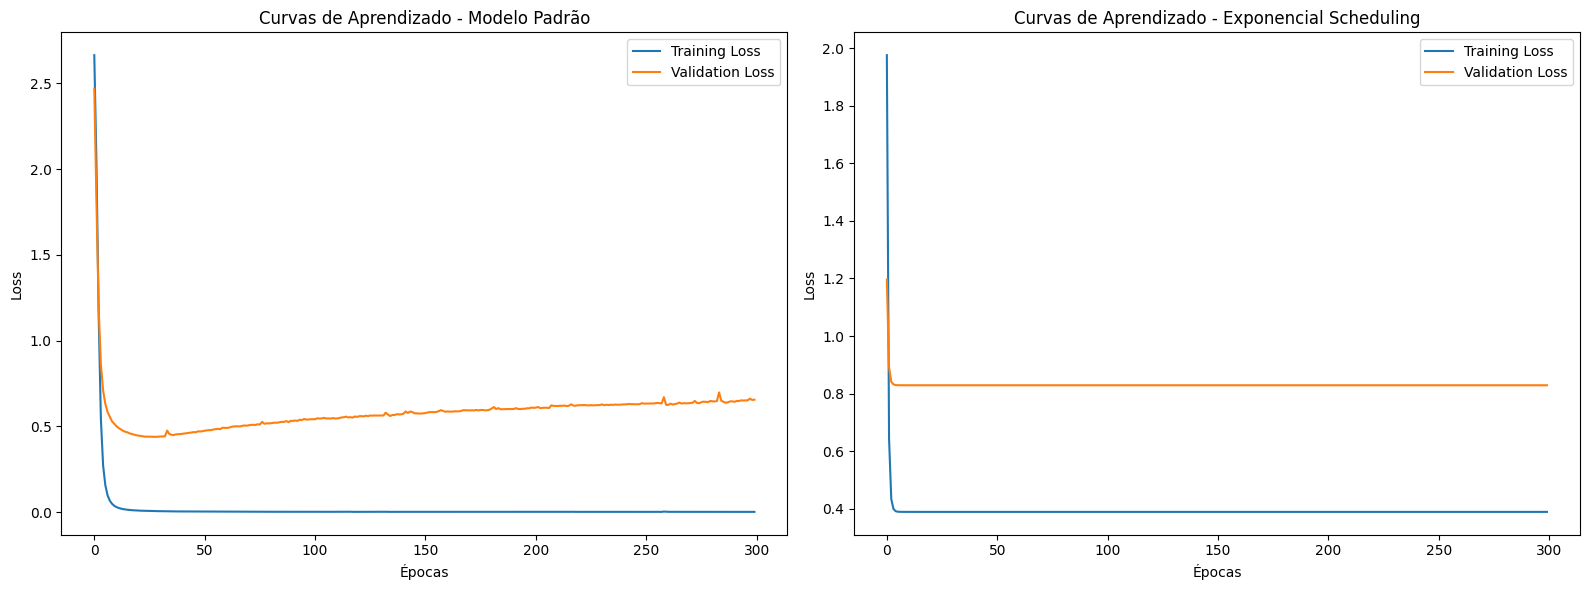

In [94]:
plot_learning_curves(historyBase, historyExponencialScheduling, 'Modelo Padrão', 'Exponencial Scheduling')

## **Power Scheduling**

In [95]:
def power_schedule(epoch, lr):
    decay_rate = 0.5  # You can adjust this as needed
    new_lr = lr * (1 / (1 + decay_rate * epoch))
    return new_lr

In [96]:
model = Sequential()
model.add(Dense(layer1Neurons, input_dim=X_train.shape[1], activation=activation))
model.add(Dense(layer2Neurons, activation=activation))
model.add(Dense(outputLayerNeurons, activation=activationOfOutput)) 

In [97]:
initial_learning_rate = 0.01 
model.compile(optimizer=optimizer, loss=loss)

In [98]:
lr_scheduler = LearningRateScheduler(power_schedule)

In [99]:
historyPowerScheduling = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), verbose=0, callbacks=[lr_scheduler])

In [100]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [101]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R² para treinamento: {r2_train}')
print(f'R² para teste: {r2_test}')

R² para treinamento: 0.3146372924756502
R² para teste: 0.21010113661271984


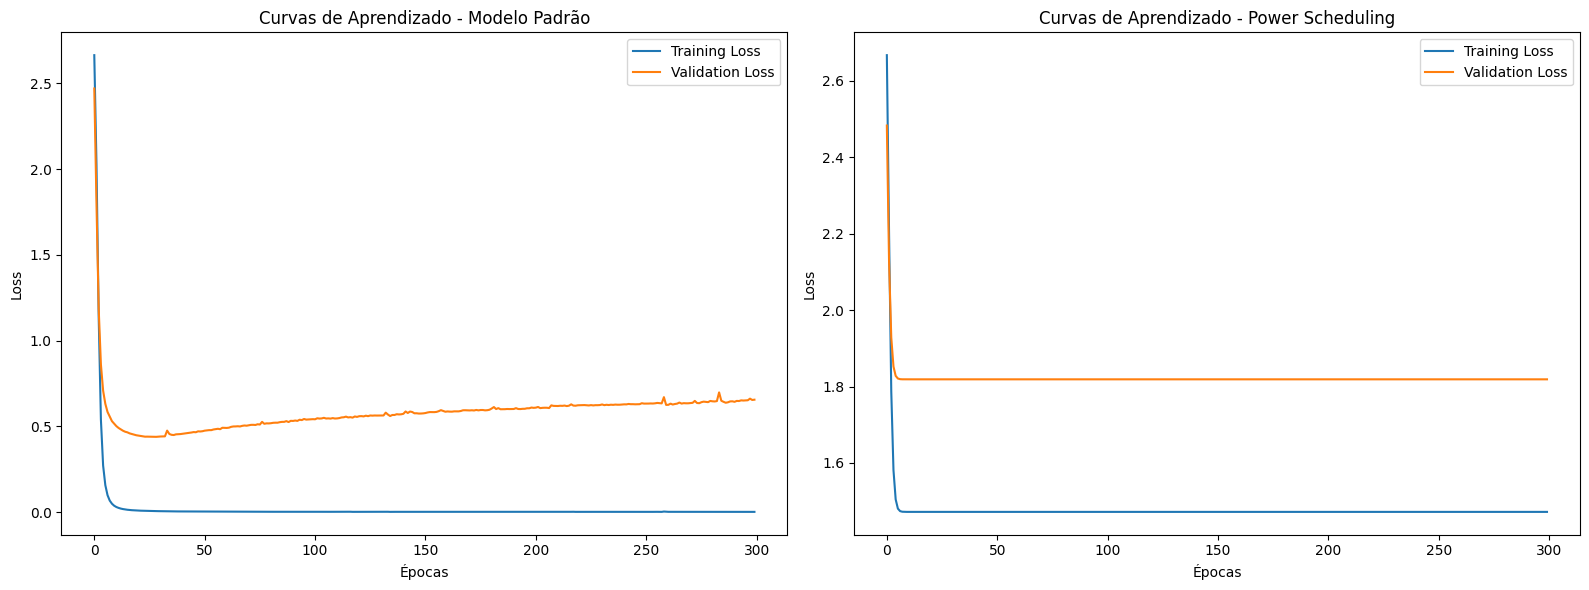

In [102]:
plot_learning_curves(historyBase, historyPowerScheduling, 'Modelo Padrão', 'Power Scheduling')